# Examination - HOUSING


In [1]:
import numpy as np
import pandas as pd

import pickle

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error



# Metoder


In [2]:
def print_RMSE(y_test, prediction, name):
    rmse = mean_squared_error(y_test, prediction, squared=False)
    return f'{name}´s predictions got RMSE: {rmse}'

In [3]:
def RMSE(y_test, prediction):
    rmse = mean_squared_error(y_test, prediction, squared=False)
    return rmse

In [4]:
def print_corr_heatmap(dataset):
    correlation_matrix = dataset.corr().round(2)
    return sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
def validate_model(models, X_train, y_train, X_val, y_val):
    for model in models_with_parameters:
        model.fit(X_train, y_train)
        pred = model.predict(X_val)
    
        print(print_RMSE(y_val, pred, model.__class__.__name__))

# Data

In [6]:
# OBS: Specify your own path for the file.  
housing = pd.read_csv(r'C:\Users\debbi\NordAxon\v_23_material\nbi_ai_v32_35-main\examinerande_kunskapskontroll\housing.csv')

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### I see missing values in column for total_bedrooms


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
housing = pd.get_dummies(housing, prefix="ocean_proximity", columns=["ocean_proximity"], drop_first=False)
# För att kunna skala datan gör jag en One-Hot-Encoding redan här

In [11]:
housing.shape

(20640, 14)

# Splitting the data

In [12]:
train_val_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [13]:
X_train_val = train_val_set.drop('population', axis=1)
y_train_val = train_val_set['population'].copy()

X_test = test_set.drop('population', axis=1)
y_test = test_set['population'].copy()

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [15]:
print(f'X_train contains {X_train.shape} values')
print(f'y_train contains {y_train.shape} values')


print(f'X_val contains {X_val.shape} values')
print(f'y_val contains {y_val.shape} values')

print(f'X_test contains {X_test.shape} values')
print(f'y_test contains {y_test.shape} values')

X_train contains (13209, 13) values
y_train contains (13209,) values
X_val contains (3303, 13) values
y_val contains (3303,) values
X_test contains (4128, 13) values
y_test contains (4128,) values


# EDA
## Getting to know the data

In [16]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
16490,-120.97,38.00,27.0,1683.0,288.0,258.0,4.7069,176900.0,0,1,0,0,0
6090,-117.87,34.10,15.0,6409.0,1363.0,1267.0,3.8750,173300.0,1,0,0,0,0
10973,-117.85,33.76,26.0,2312.0,525.0,437.0,2.8828,204700.0,1,0,0,0,0
17287,-119.74,34.35,34.0,1664.0,292.0,257.0,5.0000,329400.0,0,0,0,0,1
12615,-121.51,38.50,25.0,4719.0,745.0,739.0,5.0371,180200.0,0,1,0,0,0


<AxesSubplot: >

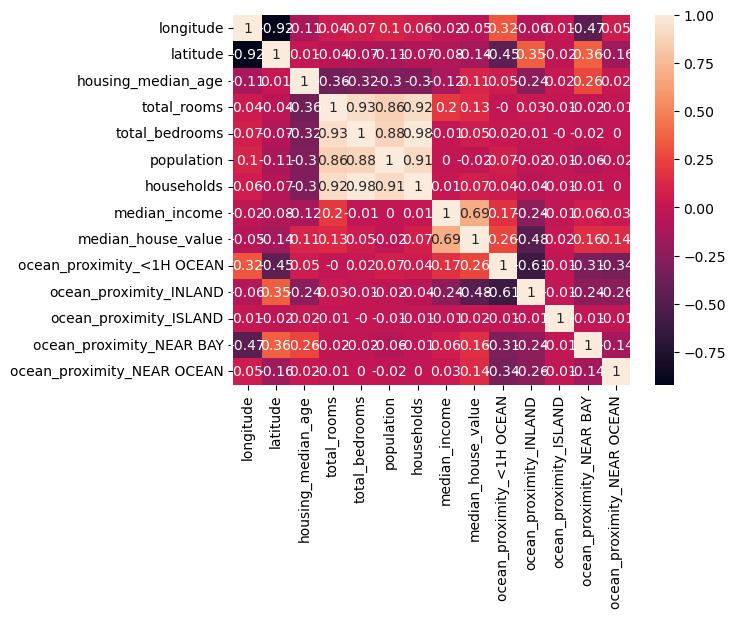

In [17]:
print_corr_heatmap(housing)

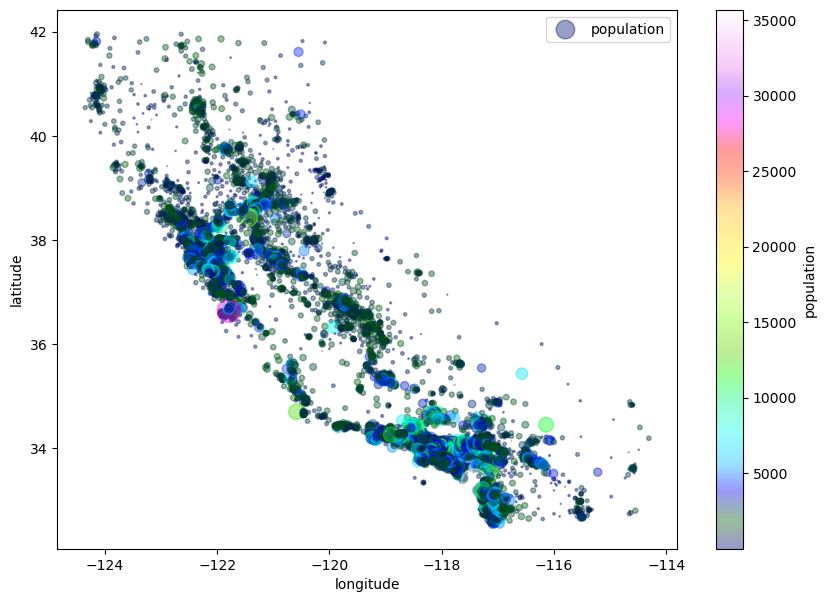

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="population", cmap=plt.get_cmap("gist_ncar"), colorbar=True,
             sharex=False)
plt.legend()


# Preparing the dataset

In [19]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [20]:
pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), ("std_scaler", StandardScaler())])

In [21]:
X_train_processed = pipeline.fit_transform(X_train)
X_train_val_processed = pipeline.transform(X_train_val)
X_val_processed = pipeline.transform(X_val)
X_test_processed = pipeline.transform(X_test)

In [22]:
X_test_processed

array([[ 0.28590977,  0.19362619, -0.28336379, ..., -0.01230589,
        -0.35670736, -0.37794812],
       [ 0.06149199, -0.23753698,  0.11380857, ..., -0.01230589,
        -0.35670736, -0.37794812],
       [-1.42465238,  1.00908698,  1.86136697, ..., -0.01230589,
         2.80341844, -0.37794812],
       ...,
       [-1.23015698,  0.77944573, -0.28336379, ..., -0.01230589,
        -0.35670736, -0.37794812],
       [-0.08811986,  0.52637169,  0.59041541, ..., -0.01230589,
        -0.35670736, -0.37794812],
       [ 0.60508171, -0.66870016, -0.91883958, ..., -0.01230589,
        -0.35670736, -0.37794812]])

# Models

## Lasso

In [23]:
lasso_params = [{'alpha' : [0.1, 1, 3, 5, 7]}]

In [24]:
lasso = Lasso()

In [25]:
gridCV_lasso = GridSearchCV(lasso, lasso_params, cv=3, scoring='neg_mean_squared_error',
                           return_train_score=True)
gridCV_lasso.fit(X_train_processed, y_train)

pd.DataFrame(gridCV_lasso.cv_results_)
    

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.032836,0.005171,0.000000,0.000000,0.1,{'alpha': 0.1},-145882.110464,-166445.975309,-270074.257707,-194134.114493,54350.082170,1,-216269.990452,-205222.165888,-154133.405002,-191875.187114,27065.909611
1,0.012234,0.001185,0.000997,0.000004,1,{'alpha': 1},-145466.020550,-166924.696458,-270553.869475,-194314.862161,54616.287986,2,-216470.963038,-205414.071015,-154321.879313,-192068.971122,27070.228670
2,0.011739,0.000371,0.000333,0.000471,3,{'alpha': 3},-145803.402326,-168842.791263,-272615.447922,-195753.880504,55157.222375,3,-218028.007814,-206815.516156,-155828.630883,-193557.384951,27068.113528
3,0.010170,0.000621,0.000000,0.000000,5,{'alpha': 5},-147441.578153,-171910.753079,-275788.593861,-198380.308364,55640.016343,4,-220697.791334,-209452.644157,-158371.349562,-196173.928351,27121.818475
4,0.009670,0.000962,0.000333,0.000471,7,{'alpha': 7},-150445.061505,-175601.605174,-279447.507529,-201831.391403,55835.526530,5,-224502.173036,-212765.013631,-161581.315877,-199616.167515,27318.219586


## Random Forest

In [26]:
random_forest_params = {'n_estimators' : [100, 220, 230, 235, 240, 250, 270], 'max_depth' : [25, 30, 25, 40]}

In [27]:
random_forest = RandomForestRegressor()

In [28]:
gridCV_random_forest = GridSearchCV(random_forest, random_forest_params, cv=3, scoring='neg_mean_squared_error',
                           return_train_score=True)
gridCV_random_forest.fit(X_train_processed, y_train)

pd.DataFrame(gridCV_random_forest.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.959301,0.310504,0.094307,0.003770,25,100,"{'max_depth': 25, 'n_estimators': 100}",-130714.304553,-151305.525740,-272334.294686,-184784.708326,62475.046492,3,-35589.367775,-28576.379243,-22723.200018,-28962.982345,5259.699906
1,11.574771,0.167269,0.250780,0.011995,25,220,"{'max_depth': 25, 'n_estimators': 220}",-128480.778654,-156687.127459,-271741.119814,-185636.341975,61964.635630,6,-30598.282972,-29619.702103,-20394.861173,-26870.948749,4596.679080
2,11.748920,0.239116,0.227257,0.011397,25,230,"{'max_depth': 25, 'n_estimators': 230}",-132729.986930,-161908.239793,-274628.338494,-189755.521739,61184.904881,24,-30312.675513,-27910.827295,-21424.966647,-26549.489818,3753.911029
3,12.132579,0.240519,0.264988,0.027132,25,235,"{'max_depth': 25, 'n_estimators': 235}",-130576.715513,-163635.629508,-276929.249046,-190380.531355,62669.680862,26,-29910.671586,-28729.032275,-20696.889695,-26445.531186,4093.427830
4,12.578113,0.293460,0.241008,0.008947,25,240,"{'max_depth': 25, 'n_estimators': 240}",-132010.260280,-162893.237288,-277161.719827,-190688.405798,62432.177049,27,-31082.603322,-28646.012179,-20442.628898,-26723.748133,4551.453118
5,13.422412,0.374790,0.274010,0.025965,25,250,"{'max_depth': 25, 'n_estimators': 250}",-128992.806409,-153672.853597,-275501.250101,-186055.636702,64045.111703,8,-31367.139763,-31552.505063,-19318.580429,-27412.741751,5723.936624
6,14.072851,0.193307,0.289627,0.015832,25,270,"{'max_depth': 25, 'n_estimators': 270}",-134873.201635,-156018.165000,-272657.343879,-187849.570171,60586.281340,19,-32040.953807,-30067.852907,-21078.164713,-27728.990476,4771.330652
7,5.277807,0.091644,0.110163,0.019168,30,100,"{'max_depth': 30, 'n_estimators': 100}",-132708.017860,-152883.934717,-276755.262700,-187449.071759,63683.926337,17,-34074.093882,-32541.231133,-21535.023639,-29383.449552,5584.846105
8,11.400594,0.132758,0.204027,0.012917,30,220,"{'max_depth': 30, 'n_estimators': 220}",-129814.680409,-155996.271055,-275780.842590,-187197.264684,63543.458242,14,-31176.916616,-32235.286253,-20127.363005,-27846.521958,5475.344603
9,12.305098,0.563969,0.251717,0.032368,30,230,"{'max_depth': 30, 'n_estimators': 230}",-131766.366772,-153355.748078,-271665.359498,-185595.824783,61495.251583,5,-30190.588530,-28967.931153,-19936.616126,-26365.045270,4572.909264


## Extra Trees

In [29]:
extratrees_params = {'n_estimators' : [110, 125, 145, 150, 155], 'max_depth' : [23, 25, 30, 35]}

In [30]:
extratrees = ExtraTreesRegressor()

In [31]:
gridCV_extratrees = GridSearchCV(extratrees, extratrees_params, cv=3, scoring='neg_mean_squared_error',
                           return_train_score=True)
gridCV_extratrees.fit(X_train_processed, y_train)

pd.DataFrame(gridCV_extratrees.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.746194,0.123729,0.129261,0.013592,23,110,"{'max_depth': 23, 'n_estimators': 110}",-129337.705291,-173276.274439,-238204.902283,-180272.960671,44719.360899,3,-226.931817,-179.339444,-204.541708,-203.604323,19.440808
1,2.923926,0.090303,0.129872,0.003103,23,125,"{'max_depth': 23, 'n_estimators': 125}",-128296.148966,-166939.376373,-254131.183727,-183122.236355,52630.964974,8,-195.581996,-186.840862,-214.120296,-198.847718,11.373671
2,3.530512,0.066481,0.161444,0.010871,23,145,"{'max_depth': 23, 'n_estimators': 145}",-128118.868352,-166927.497285,-253900.912368,-182982.426002,52590.247520,7,-197.574913,-164.605294,-155.949706,-172.709971,17.933745
3,3.907014,0.267670,0.160141,0.009460,23,150,"{'max_depth': 23, 'n_estimators': 150}",-126393.274265,-178059.513069,-259920.331552,-188124.372962,54974.811265,16,-230.765890,-175.645536,-202.312126,-202.907851,22.506733
4,4.152725,0.036803,0.188578,0.040232,23,155,"{'max_depth': 23, 'n_estimators': 155}",-126386.506827,-168727.464425,-260682.703053,-185265.558102,56059.483212,13,-168.039070,-173.072962,-187.039401,-176.050478,8.037510
5,2.845402,0.120356,0.133605,0.007347,25,110,"{'max_depth': 25, 'n_estimators': 110}",-128675.891950,-166076.426698,-265022.369364,-186591.562671,57522.422172,15,-45.729082,-39.513813,-40.440422,-41.894439,2.737763
6,3.133094,0.069199,0.145812,0.027286,25,125,"{'max_depth': 25, 'n_estimators': 125}",-127141.750467,-164927.335440,-254480.888119,-182183.324675,53398.756963,5,-37.419911,-47.461836,-31.607787,-38.829845,6.548723
7,3.688258,0.005405,0.177262,0.024864,25,145,"{'max_depth': 25, 'n_estimators': 145}",-125358.432228,-170346.608142,-255413.550292,-183706.196887,53928.609551,10,-39.267002,-36.119891,-31.581488,-35.656127,3.154688
8,3.884762,0.065184,0.178897,0.027773,25,150,"{'max_depth': 25, 'n_estimators': 150}",-126849.457814,-167433.661461,-256018.548613,-183433.889296,53933.100366,9,-35.296209,-34.375215,-30.187451,-33.286291,2.223236
9,4.173544,0.134221,0.176863,0.003288,25,155,"{'max_depth': 25, 'n_estimators': 155}",-125276.832292,-176051.419393,-266841.615824,-189389.955836,58558.144324,18,-47.033668,-35.610817,-35.760110,-39.468198,5.349942


In [32]:
params_lasso = gridCV_lasso.best_params_
params_forest = gridCV_random_forest.best_params_
params_extratrees = gridCV_extratrees.best_params_

# Validation

In [33]:
print(params_lasso, params_forest, params_extratrees)

{'alpha': 0.1} {'max_depth': 40, 'n_estimators': 235} {'max_depth': 35, 'n_estimators': 125}


In [34]:
lasso = Lasso(alpha=0.1)

random_forest = RandomForestRegressor(n_estimators=100, max_depth=25)

extra_trees = ExtraTreesRegressor(n_estimators=125, max_depth=25)


In [35]:
models_with_parameters = [lasso, random_forest, extra_trees] 

In [36]:
validate_model(models_with_parameters, X_train_processed, y_train, X_val_processed, y_val)


    

Lasso´s predictions got RMSE: 422.50514376893153
RandomForestRegressor´s predictions got RMSE: 391.48397144055133
ExtraTreesRegressor´s predictions got RMSE: 389.18594311936954


# Testing the best model

In [37]:
extra_trees.fit(X_train_val_processed, y_train_val)
extra_trees_pred = extra_trees.predict(X_test_processed)

In [38]:
print(print_RMSE(y_test, extra_trees_pred, "extra_trees"))

extra_trees´s predictions got RMSE: 411.8128147056562


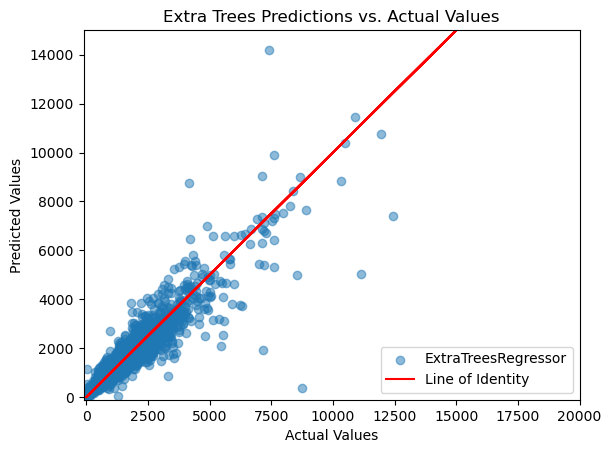

In [39]:
plt.scatter(y_test, extra_trees_pred, alpha=0.5, label=extra_trees.__class__.__name__)
plt.plot(y_train, y_train, color="red", label="Line of Identity")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Extra Trees Predictions vs. Actual Values")

plt.xlim(-100, 20000)
plt.ylim(-100, 15000)
plt.legend()
plt.show()

In [40]:
print(print_RMSE(y_test, extra_trees_pred, "ExtraTreesRegressor"))
#rmse = mean_squared_error(y_test, extra_trees_pred, squared=False)
rmse = RMSE(y_test, extra_trees_pred)
procentage = rmse/np.mean(y_test)
print(f'Error score in procentage: {procentage}')

ExtraTreesRegressor´s predictions got RMSE: 411.8128147056562
Error score in procentage: 0.2896883872503256
